************

***********


# Final Project - AtliQ Hardware Financial Analysis 

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Step 1. Data overview](#data_overview)    
* [Step 2. Data Analysis](#data_analysis)
    * [2.1 Key Questions](#product_analysis)
       * [1 How have revenue and profit changed over time?](#q1)
       * [2 How manufacturing costs changed over time?](#q2)
       * [3 What categories are most profitable?](#q3)
       * [4 What is gross profit and gross margin over the past few years?](#q4)
       * [5 Are there any seasonal trends in revenue? What is the most profitable month/period of the year/year](#q5)
       * [6 How does revenue distribution vary across different regions and countries?](#q6)
    * [2.2 Hypotheses](#sales_analysis)
* [Step 3. Conclusion](#conclusion)

# Introduction <a id='intro'></a>
    
The project aims at conducting a financial analysis for the AtliQ Hardware, one of the leading computer hardware producers in India, that expanded internationally. The project will look into the financial area, conduct the necessary research, and create dashboards that the company will be able to use later. Research the company’s revenue, profit, and margin trends over the past few years to identify key performance drivers, market shifts, and opportunities for growth, using advanced data collection, analysis, and visualization tools.



AtliQ Hardware has provided us with a backup of their database in the SQLite format.

The data we have:
* dim_customer - contains customer-related data
* dim_product - contains product-related data
* fact_pre_discount - contains pre-invoice deductions information for each product
* fact_manufacturing_cost - contains the cost incurred in the production of each product
* fact_gross_price - contains gross price information for each product
* fact_sales_monthly - contains monthly sales data for each product


__Questions__:

This study is targeted to find out answers to the following questions:

1. How have revenue/profits changed over time? 
2. How manufacturing costs changed over time?
3. What categories are most profitable?
4. What is gross profit and gross margin over the past few years?
5. Are there any seasonal trends in revenue? What is the most profitable month/period of the year/year.
6. Are there any regional variations in profit margins?


__Hypotheses:__

To ensure a comprehensive understanding of the company's financial performance and market position, we are going to test the following hypotheses:

1. Revenue has steadily increased over the past few years.
2. Certain product categories contribute disproportionately to total revenue.
3. There are significant seasonal spikes in revenue.
4. Revenue from international markets has grown at a faster rate compared to the domestic market.

__Plan of action:__

Step 1: Data Overview

Step 2: Financial Analysis(Key Questions)

Step 3: Testing hypotheses

Step 4: Make conclusions based on hypothesis



# Step 1. Data overview <a id='data_overview'></a>

Obtaining the general information about the table.

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install sidetable


#Importing libraries to work with the dataset
import pandas as pd
import sqlite3
#Adding simple visualization library
import matplotlib.pyplot as plt
#Adding simple visualization library
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
import matplotlib.pyplot as plt
#Adding simple visualization library
import plotly.graph_objects as go
#Adding simple visualization library
import plotly.express as px
import sidetable
import calendar
import datetime as dt
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import kendalltau
from scipy.stats import kruskal

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")
sns.color_palette("viridis", as_cmap=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 6.8 MB/s eta 0:00:00


In [3]:
### connect to the database
con = sqlite3.connect('atliq_db.sqlite3')

### check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

### execute simple query in Python with your connection
query="""Select * from 
dim_customer
LIMIT 10
"""
dim_customer=pd.read_sql_query(query, con)
dim_customer.head(10)

# Execute a query to check the distinct channels
query_channels = """
SELECT DISTINCT channel 
FROM dim_customer
"""
distinct_channels = pd.read_sql_query(query_channels, con)
print(distinct_channels)

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]
       channel
0       Direct
1  Distributor
2     Retailer


There are 6 tables in the dataset: 
* dim_customer - contains customer-related data
* dim_product - contains product-related data
* fact_pre_discount - contains pre-invoice deductions information for each product
* fact_manufacturing_cost - contains the cost incurred in the production of each product
* fact_gross_price - contains gross price information for each product
* fact_sales_monthly - contains monthly sales data for each product


Let's look in details at each table.

__Customer-related data__

In [4]:
# Checking 10 first lines of the table
query="""Select * from 
dim_customer
LIMIT 10
"""

dim_customer=pd.read_sql_query(query, con)
dim_customer.head(10)

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC
5,70004070,Atliq e Store,E-Commerce,Direct,Japan,ROA,APAC
6,70005163,Atliq e Store,E-Commerce,Direct,Pakistan,ROA,APAC
7,70006157,Atliq Exclusive,Brick & Mortar,Direct,Philiphines,ROA,APAC
8,70006158,Atliq e Store,E-Commerce,Direct,Philiphines,ROA,APAC
9,70007198,Atliq Exclusive,Brick & Mortar,Direct,South Korea,ROA,APAC


Let's check the distinct information on market (country), sub-zone and region. 


In [5]:
query='''SELECT DISTINCT market, sub_zone,region 
                 FROM dim_customer'''

dim_customer=pd.read_sql_query(query, con)
print(dim_customer)

            market sub_zone region
0            India    India   APAC
1        Indonesia      ROA   APAC
2            Japan      ROA   APAC
3         Pakistan      ROA   APAC
4      Philiphines      ROA   APAC
5      South Korea      ROA   APAC
6        Australia      ANZ   APAC
7       Newzealand      ANZ   APAC
8       Bangladesh      ROA   APAC
9           France       SE     EU
10         Germany       NE     EU
11           Italy       SE     EU
12     Netherlands       NE     EU
13          Norway       NE     EU
14          Poland       NE     EU
15        Portugal       SE     EU
16           Spain       SE     EU
17          Sweden       NE     EU
18         Austria       NE     EU
19  United Kingdom       NE     EU
20             USA       NA     NA
21          Canada       NA     NA
22          Mexico    LATAM  LATAM
23          Brazil    LATAM  LATAM
24           China      ROA   APAC
25           Chile    LATAM  LATAM
26        Columbia    LATAM  LATAM


In [6]:
query='''SELECT DISTINCT market
                 FROM dim_customer'''

dim_customer=pd.read_sql_query(query, con)
print(dim_customer)

            market
0            India
1        Indonesia
2            Japan
3         Pakistan
4      Philiphines
5      South Korea
6        Australia
7       Newzealand
8       Bangladesh
9           France
10         Germany
11           Italy
12     Netherlands
13          Norway
14          Poland
15        Portugal
16           Spain
17          Sweden
18         Austria
19  United Kingdom
20             USA
21          Canada
22          Mexico
23          Brazil
24           China
25           Chile
26        Columbia


In [7]:
query='''SELECT DISTINCT region 
                 FROM dim_customer'''

dim_customer=pd.read_sql_query(query, con)
print(dim_customer)

  region
0   APAC
1     EU
2     NA
3  LATAM


In [8]:
query='''SELECT DISTINCT sub_zone 
                 FROM dim_customer'''

dim_customer=pd.read_sql_query(query, con)
print(dim_customer)

  sub_zone
0    India
1      ROA
2      ANZ
3       SE
4       NE
5       NA
6    LATAM


AtliQ is represented in 26 countries, 7 sub-zones and 4 regions. 

In [9]:
query='''SELECT DISTINCT customer
                 FROM dim_customer'''

dim_customer=pd.read_sql_query(query, con)
print(dim_customer)

           customer
0   Atliq Exclusive
1     Atliq e Store
2           Neptune
3         Synthetic
4             Novus
..              ...
70     Circuit City
71      Radio Shack
72           Costco
73          walmart
74          Staples

[75 rows x 1 columns]


__Product-related data__

In [10]:
# Checking 10 first lines of the table
query="""Select * from 
dim_product
LIMIT 10
"""

dim_product=pd.read_sql_query(query, con)
dim_product.head(10)

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard
5,A0219150202,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus
6,A0220150203,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium
7,A0320150301,P & A,Peripherals,Internal HDD,AQ Zion Saga,Standard
8,A0321150302,P & A,Peripherals,Internal HDD,AQ Zion Saga,Plus
9,A0321150303,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium


In [11]:
# SQL query to get distinct categories
query = """
SELECT DISTINCT category
FROM dim_product;
"""

# Execute the query and load the result into a DataFrame
distinct_categories = pd.read_sql_query(query, con)

# Display the DataFrame
print(distinct_categories)


                       category
0                  Internal HDD
1                  Graphic Card
2                    Processors
3                   MotherBoard
4                         Mouse
5                      Keyboard
6                     Batteries
7               Personal Laptop
8               Business Laptop
9                 Gaming Laptop
10             Personal Desktop
11  External Solid State Drives
12             USB Flash Drives
13               Wi fi extender


__Pre-invoice deductions information for each product__

In [12]:
# Checking 10 first lines of the table
query="""Select * from 
fact_pre_discount
LIMIT 10
"""

fact_pre_discount=pd.read_sql_query(query, con)
fact_pre_discount.head(10)

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
5,70002018,2018,0.2956
6,70002018,2019,0.2577
7,70002018,2020,0.2255
8,70002018,2021,0.2061
9,70002018,2022,0.2931


__The cost incurred in the production of each product__


In [13]:
# Checking 10 first lines of the table
query="""Select * from 
fact_manufacturing_cost
LIMIT 10
"""
fact_manufacturing_cost=pd.read_sql_query(query, con)
fact_manufacturing_cost.head(10)

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036
5,A0118150102,2019,5.3235
6,A0118150102,2020,5.7180
7,A0118150102,2021,6.2835
8,A0118150103,2018,5.9469
9,A0118150103,2019,5.5306


__Gross price information for each product__

In [14]:
# Checking 10 first lines of the table
query="""Select * from 
fact_gross_price
LIMIT 10
"""
fact_gross_price=pd.read_sql_query(query, con)
fact_gross_price.head(10)

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875
5,A0118150102,2019,18.5595
6,A0118150102,2020,19.8577
7,A0118150102,2021,21.4565
8,A0118150103,2018,19.3630
9,A0118150103,2019,19.3442


In [15]:
query='''SELECT DISTINCT fiscal_year 
                 FROM fact_sales_monthly'''

fact_gross_price=pd.read_sql_query(query, con)
print(fact_gross_price)


   fiscal_year
0       2018.0
1       2019.0
2       2020.0
3       2021.0
4       2022.0
5          NaN


__Monthly sales data for each product__

In [16]:
query="""Select * from 
fact_sales_monthly
LIMIT 10
"""
fact_sales_monthly=pd.read_sql_query(query, con)
fact_sales_monthly.head(10)



,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017,51,2018
1,2017-09-01,A0118150101,70002018,77,2018
2,2017-09-01,A0118150101,70003181,17,2018
3,2017-09-01,A0118150101,70003182,6,2018
4,2017-09-01,A0118150101,70006157,5,2018
5,2017-09-01,A0118150101,70006158,7,2018
6,2017-09-01,A0118150101,70007198,29,2018
7,2017-09-01,A0118150101,70007199,34,2018
8,2017-09-01,A0118150101,70008169,22,2018
9,2017-09-01,A0118150101,70008170,5,2018


__Checking the data for duplicates.__


In [16]:
# Function to get column names of a table
def get_table_columns(table_name):
    query = f"PRAGMA table_info({table_name})"
    columns_df = pd.read_sql_query(query, con)
    return columns_df['name'].tolist()

# Defining the tables
tables = ['dim_product', 'dim_customer', 'fact_pre_discount', 'fact_manufacturing_cost', 'fact_gross_price', 'fact_sales_monthly']

# Printing the column names of each table
for table in tables:
    columns = get_table_columns(table)
    print(f"Columns in {table}: {columns}")



Columns in dim_product: ['product_code', 'division', 'segment', 'category', 'product', 'variant']
Columns in dim_customer: ['customer_code', 'customer', 'platform', 'channel', 'market', 'sub_zone', 'region']
Columns in fact_pre_discount: ['customer_code', 'fiscal_year', 'pre_invoice_discount_pct']
Columns in fact_manufacturing_cost: ['product_code', 'cost_year', 'manufacturing_cost']
Columns in fact_gross_price: ['product_code', 'fiscal_year', 'gross_price']
Columns in fact_sales_monthly: ['date', 'product_code', 'customer_code', 'sold_quantity', 'fiscal_year']


In [17]:
# Correct column names 
tables = {
    'dim_product': ['product_code', 'division', 'segment', 'category', 'product', 'variant'],  
    'dim_customer': ['customer_code', 'customer', 'platform', 'channel', 'market', 'sub_zone', 'region'], 
    'fact_pre_discount': ['customer_code', 'fiscal_year', 'pre_invoice_discount_pct'],  
    'fact_manufacturing_cost': ['product_code', 'cost_year', 'manufacturing_cost'],  
    'fact_gross_price': ['product_code', 'fiscal_year', 'gross_price'], 
    'fact_sales_monthly': ['date', 'product_code', 'customer_code', 'sold_quantity', 'fiscal_year'] 
}

# Checking for full duplicates in each table
for table, columns in tables.items():
    query = f"SELECT {', '.join(columns)}, COUNT(*) as count FROM {table} GROUP BY {', '.join(columns)} HAVING count > 1"
    duplicates_df = pd.read_sql_query(query, con)
    if not duplicates_df.empty:
        print(f"Table {table} has {len(duplicates_df)} full duplicate rows.")
    else:
        print(f"Table {table} has no full duplicate rows.")


Table dim_product has no full duplicate rows.
Table dim_customer has no full duplicate rows.
Table fact_pre_discount has no full duplicate rows.
Table fact_manufacturing_cost has no full duplicate rows.
Table fact_gross_price has no full duplicate rows.
Table fact_sales_monthly has no full duplicate rows.


There are no full duplicate rows in the dataset.

__Checking the data for missing values.__


In [18]:
# Checking  for missing values in each table
missing_values = {}

for table in tables:
    query = f"SELECT * FROM {table}"
    df = pd.read_sql_query(query, con)
    missing_counts = df.isnull().sum()
    missing_values[table] = missing_counts[missing_counts > 0]

# Displaying missing values
for table, missing in missing_values.items():
    if not missing.empty:
        print(f"Table {table} has missing values:\n{missing}")
    else:
        print(f"Table {table} has no missing values.")


Table dim_product has no missing values.
Table dim_customer has no missing values.
Table fact_pre_discount has no missing values.
Table fact_manufacturing_cost has no missing values.
Table fact_gross_price has no missing values.
Table fact_sales_monthly has missing values:
customer_code    1
sold_quantity    1
fiscal_year      1
dtype: int64


Missing values were detected only in the table 'fact_sales_minthly', however number of missing data is insufficient and won't influence further analysis.

[Back to Contents](#back)

# Step 2. Data Analysis <a id='data_analysis'></a>


Answering Key Questions

## How have revenue and profit changed over time?<a id='q1'></a>

- For calculating the revenue we are going to joing three tables: fact_manufacturing_cost, fact_gross_price and fact_sales_montly and create a column named revenue. We are going to multiply the gross_price of each item by the amount of time it was sold.


- For calculating the profit we are going to joing three tables: fact_manufacturing_cost, fact_gross_price and fact_sales_montly and create a column named profit. We are going to subtract a manufacturing cost of every item on every date.


- Then we are going to use python matplotlib to create a graph, visualizing the changes in revenue and profit over time from 2018 to 2022.

In [1]:
#Calculating the average 
query = '''SELECT
    AVG(gross_price) AS average_gross_price
FROM fact_gross_price'''
fact_gross_price = pd.read_sql_query(query, con)
print(fact_gross_price)


NameError: name 'pd' is not defined

In [20]:
query = '''SELECT
    AVG(manufacturing_cost) AS average_manufacturing_cost
FROM fact_manufacturing_cost'''
fact_manufacturing_cost = pd.read_sql_query(query, con)
print(fact_manufacturing_cost)


   average_manufacturing_cost
0                   63.000676


Here's a breakdown of the alias usage in the query:

sm is an alias for fact_sales_monthly.
mc is an alias for fact_manufacturing_cost.
r is an alias for the Revenue subquery.
c is an alias for the Costs subquery.
p is an alias for the Profits subquery.

In [21]:
con = sqlite3.connect('atliq_db.sqlite3')

query = """
WITH Revenue AS (
    SELECT
        sm.date,
        SUM(sm.sold_quantity * gp.gross_price) AS total_revenue
    FROM
        fact_sales_monthly sm
    JOIN
        fact_gross_price gp ON sm.product_code = gp.product_code AND sm.fiscal_year = gp.fiscal_year
    GROUP BY
        sm.date
),
Costs AS (
    SELECT
        sm.date,
        SUM(sm.sold_quantity * mc.manufacturing_cost) AS total_cost
    FROM
        fact_sales_monthly sm
    JOIN
        fact_manufacturing_cost mc ON sm.product_code = mc.product_code AND sm.fiscal_year = mc.cost_year
    GROUP BY
        sm.date
),
Profits AS (
    SELECT
        r.date,
        r.total_revenue - COALESCE(c.total_cost, 0) AS profit
    FROM
        Revenue r
    LEFT JOIN
        Costs c ON r.date = c.date
)
SELECT
    p.date,
    p.profit,
    r.total_revenue
FROM
    Profits p
JOIN
    Revenue r ON p.date = r.date
ORDER BY
    p.date;
"""

df = pd.read_sql_query(query, con)

# Save the DataFrame to a CSV file
df.to_csv('q1_revenue_over_time.csv', index=False)

print(df)

          date        profit  total_revenue
0   2017-09-01  1.430731e+05   2.035608e+05
1   2017-10-01  1.860437e+05   2.645338e+05
2   2017-11-01  2.639186e+05   3.751914e+05
3   2017-12-01  2.710027e+05   3.855987e+05
4   2018-01-01  1.467896e+05   2.087000e+05
5   2018-02-01  1.460599e+05   2.076068e+05
6   2018-03-01  1.576290e+05   2.242247e+05
7   2018-04-01  1.543483e+05   2.195039e+05
8   2018-05-01  1.480479e+05   2.105693e+05
9   2018-06-01  1.499751e+05   2.132027e+05
10  2018-07-01  1.479283e+05   2.104337e+05
11  2018-08-01  1.553046e+05   2.208852e+05
12  2018-09-01  3.581948e+05   5.095770e+05
13  2018-10-01  4.361820e+05   6.204582e+05
14  2018-11-01  5.649800e+05   8.035240e+05
15  2018-12-01  6.145779e+05   8.743568e+05
16  2019-01-01  3.475389e+05   4.943185e+05
17  2019-02-01  3.514838e+05   4.998604e+05
18  2019-03-01  3.369862e+05   4.792342e+05
19  2019-04-01  3.460775e+05   4.923904e+05
20  2019-05-01  3.518384e+05   5.004923e+05
21  2019-06-01  3.395501e+05   4

Let's visualize the findings.

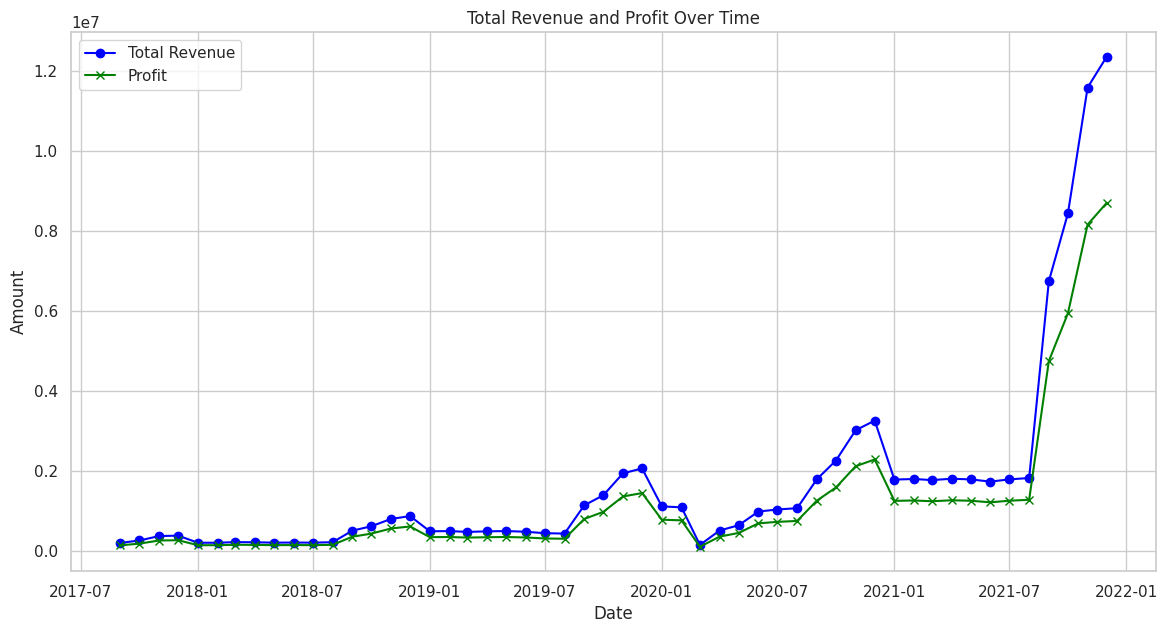

In [22]:
# Converting 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Setting the 'date' column as the index
df.set_index('date', inplace=True)

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['total_revenue'], label='Total Revenue', color='blue', marker='o')
plt.plot(df.index, df['profit'], label='Profit', color='green', marker='x')
plt.title('Total Revenue and Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

__Findings__

The graph illustrates an upward trend in total revenue and profit over a four-year period, from mid-2017 to the beginning of 2022. Notably, total revenue consistently exceeds profit throughout this period, with the disparity becoming more pronounced from September 2022 onward.

From mid-2017 to mid-2019 the difference between total revenue and profit was minimal, generally staying below 1 million USD.
At the end of 2018, a slight peak was observed, with the difference just slightly exceeding 1 million USD.

At the end of 2019 a significant peak is observed, with the difference between total revenue and profit reaching approximately 0.2 billion USD.In the early 2020 there is a decline in the difference between total revenue and profit. From early 2020 onwards, both total revenue and profit exhibit exponential growth.

By the end of 2021, profit peaks at over 2.1 billion USD, while total revenue continues to surpass profit.
The difference between profit and total revenue becomes notably larger, with figures reaching 4.8 million USD and 6.8 million USD, respectively.

Implications: The graph highlights the importance of cost management in sustaining profitability despite increasing total revenue. Businesses should focus on strategies to control costs while leveraging growth opportunities to maximize profit margins. Regular financial analysis and proactive adjustments to operational strategies are essential for maintaining a healthy balance between revenue and profit.



## How manufacturing costs changed over time?<a id='q2'></a>
Understanding changes in manufacturing costs is vital for evaluating cost management and its impact on profitability.

   year  total_cost
0  2018   4351.9150
1  2019   9153.2698
2  2020  14250.2936
3  2021  21396.4751
4  2022  25314.8450


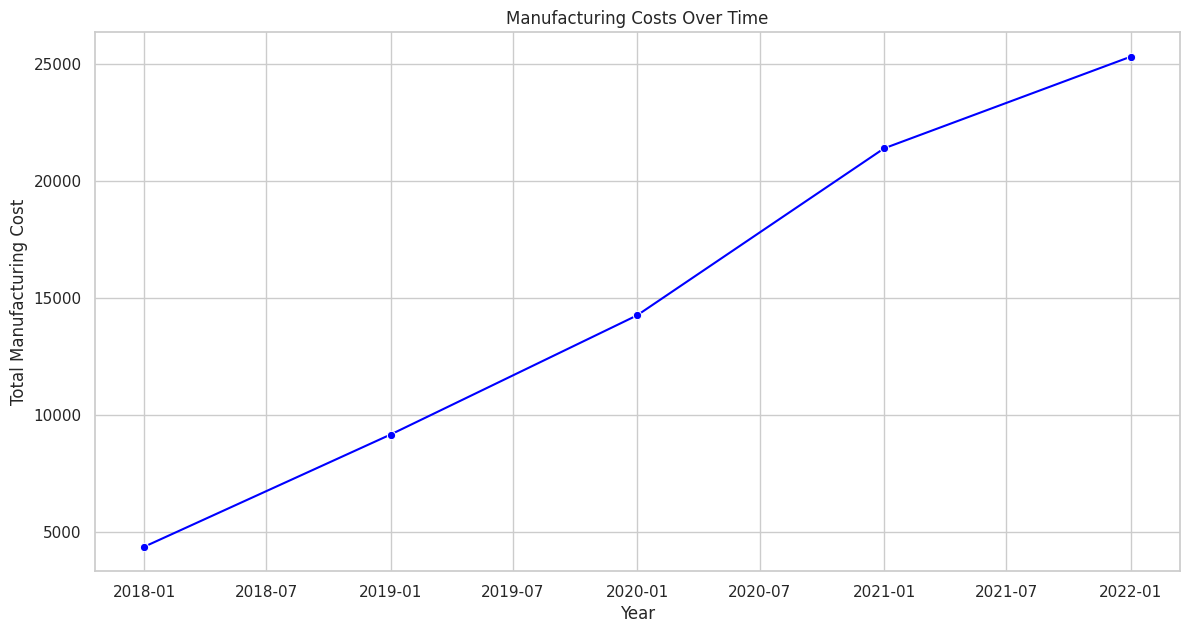

In [23]:
# Connect to your SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

# SQL query to calculate manufacturing costs over time
query = """
SELECT
    mc.cost_year AS year,
    SUM(mc.manufacturing_cost) AS total_cost
FROM
    fact_manufacturing_cost mc
GROUP BY
    mc.cost_year
ORDER BY
    mc.cost_year;
"""
df = pd.read_sql_query(query, con)

print(df)
# Execute the query and load the result into a DataFrame
df = pd.read_sql_query(query, con)

# Close the database connection
con.close()

# Convert the year column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Plot the data using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='year', y='total_cost', marker='o', linestyle='-', color='blue')

# Customize the plot
plt.title('Manufacturing Costs Over Time')
plt.xlabel('Year')
plt.ylabel('Total Manufacturing Cost')
plt.grid(True)

# Show the plot
plt.show()



We will use the median cost per product per year to account for variations in production volumes and changes in the product lineup.


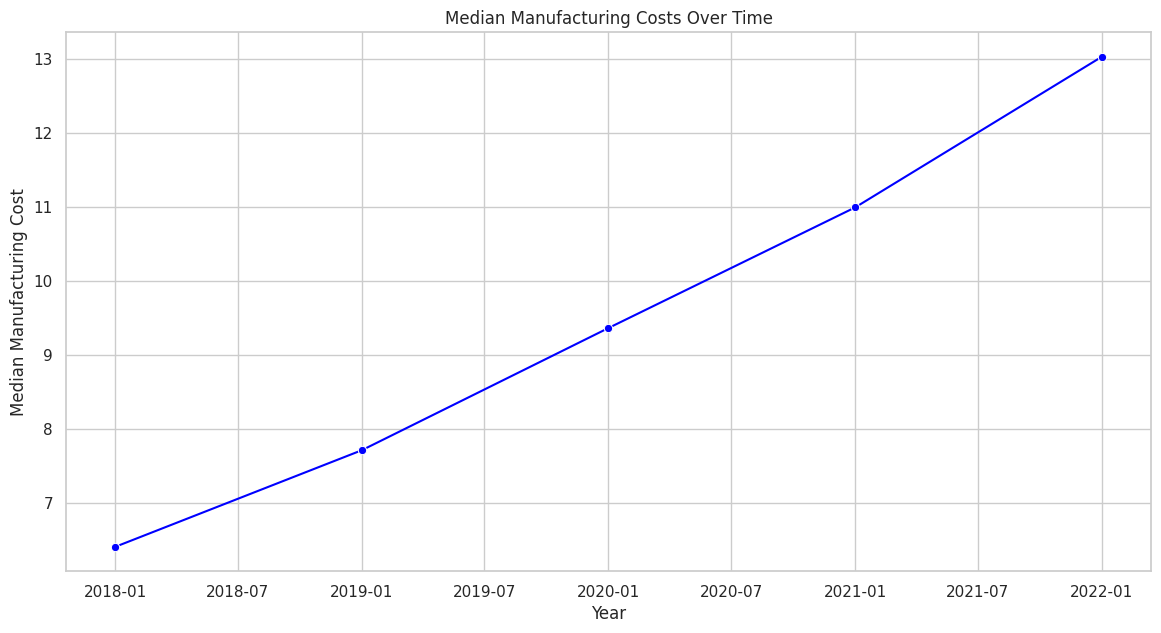

In [24]:
# Connect to your SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

# SQL query to calculate manufacturing costs by product and year
query = """
SELECT
    mc.cost_year AS year,
    mc.product_code,
    mc.manufacturing_cost
FROM
    fact_manufacturing_cost mc
ORDER BY
    mc.cost_year, mc.product_code;
"""

# Execute the query and load the result into a DataFrame
df = pd.read_sql_query(query, con)

# Close the database connection
con.close()

# Convert the year column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Calculate the median manufacturing cost per year
median_costs = df.groupby('year')['manufacturing_cost'].median().reset_index()

# Save the DataFrame to a CSV file
median_costs.to_csv('q2_manufacture_cost_over_time.csv', index=False)

# Plot the median manufacturing costs using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=median_costs, x='year', y='manufacturing_cost', marker='o', linestyle='-', color='blue')

# Customize the plot
plt.title('Median Manufacturing Costs Over Time')
plt.xlabel('Year')
plt.ylabel('Median Manufacturing Cost')
plt.grid(True)

# Show the plot
plt.show()


__Findings__


Over the past four years, the median manufacturing cost increased from 7 USD to 13 USD, representing an 86% rise and an average annual increase of 1.50 USD. This trend could be attributed to factors such as inflation in raw material costs, rising labor expenses, more complex production processes, or a shift towards higher-cost products. Analyzing these cost drivers is crucial for understanding the underlying reasons behind the increase.

To mitigate the impact of rising costs, the business should consider several strategies. Adjusting pricing to reflect higher production costs, investing in operational efficiency, and evaluating the profitability of different products can help maintain margins. Additionally, updating financial forecasts, exploring better supplier contracts, and improving cost management practices are essential for sustaining profitability and adapting to the evolving cost landscape.

## What categories are most profitable?<a id='q3'></a>
Identifying the most profitable product categories helps in focusing on high-margin products and strategic planning.

       category  total_profit
0  Internal HDD  5.232315e+07
1  Graphic Card  8.543124e+06


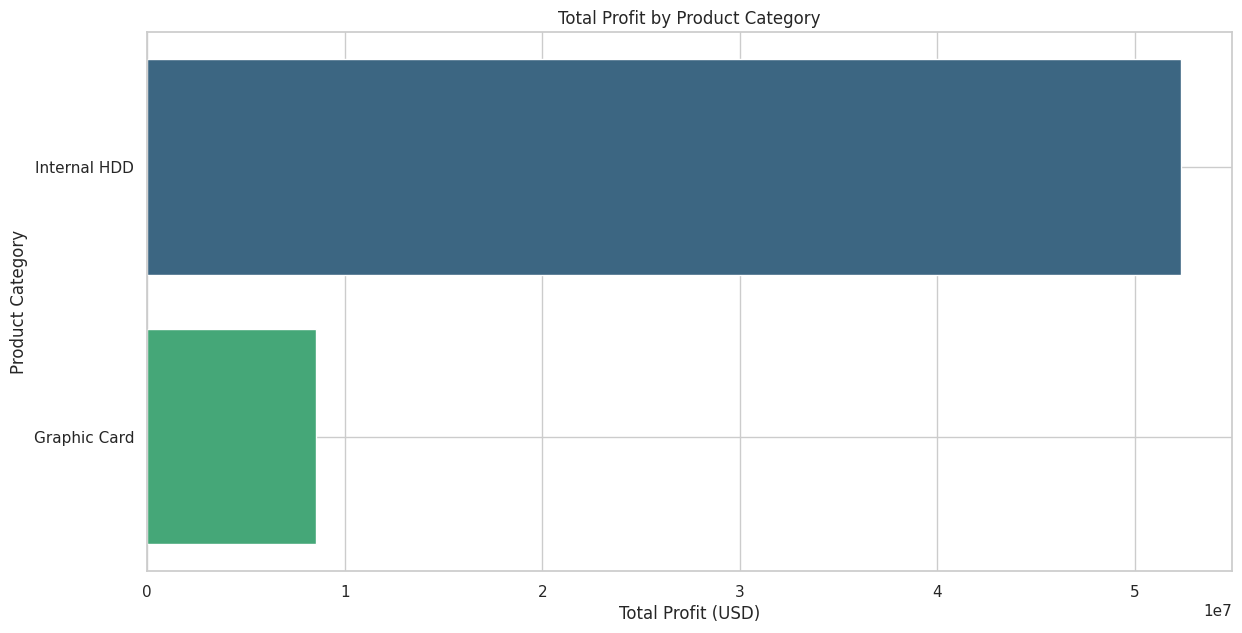

In [26]:
# Connect to your SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

# SQL query to calculate profits by product category
query = """
WITH Profits AS (
    SELECT
        dp.category,
        SUM(fp.gross_price * fsm.sold_quantity) - SUM(fsm.sold_quantity * fmc.manufacturing_cost) AS total_profit
    FROM
        fact_sales_monthly fsm
    JOIN
        fact_gross_price fp ON fsm.product_code = fp.product_code AND fsm.fiscal_year = fp.fiscal_year
    JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    JOIN
        dim_product dp ON fsm.product_code = dp.product_code
    GROUP BY
        dp.category
    ORDER BY
        total_profit DESC
)
SELECT
    category,
    total_profit
FROM
    Profits;
"""

# Execute the query and load the result into a DataFrame
df = pd.read_sql_query(query, con)

# Save the DataFrame to a CSV file
df.to_csv('q3_total_profit_by_product_category.csv', index=False)

# Close the database connection
con.close()

# Display the DataFrame
print(df)

# Visualize the results using Seaborn

plt.figure(figsize=(14, 7))
sns.barplot(x='total_profit', y='category', data=df, palette='viridis')
plt.title('Total Profit by Product Category')
plt.xlabel('Total Profit (USD)')
plt.ylabel('Product Category')
plt.grid(True)
plt.show()


__Findings__


The graph clearly shows that only two categories are profitable:
- **Internal HDD** that brought more that 5.2 million USD
- **Graphic Card** that brought 0.9 million USD

Sales from the Internal HDD category far exceed those of all other categories, indicating it is the leading product line for AtliQ and is highly in demand in the market. The remaining 12 categories did not show any profit over the four years, which could be due to high manufacturing costs, lower margins, or competitive pressure. It is crucial to analyze these insights to identify where adjustments or strategic changes are needed to improve profitability across all categories.






## What is gross profit and gross margin over the past few years?<a id='q4'></a>
Gross profit and gross margin are critical metrics for assessing the company's efficiency in managing production costs relative to sales.

__Gross profit__ is a key financial metric that measures a company's profitability by calculating the difference between its total revenue and the cost of goods sold (COGS). It represents the profit a company makes after deducting the direct costs associated with producing and selling its products or services. Gross profit is crucial for understanding a company's financial health, as it indicates how efficiently a company is using its resources to produce goods and generate revenue. High gross profit suggests strong profitability and effective cost management, while low gross profit may indicate issues with production costs or pricing strategies.

__Gross margin__ is the percentage of a company's revenue that's retained after direct expenses such as labor and materials have been subtracted. It is calculated as: Gross Margin (%)
(
Gross Profit
Total Revenue
)
×
100
Gross Margin (%)=( 
Total Revenue
Gross Profit
​
 )×100

Gross margin is expressed as a percentage to indicate the efficiency of a company's production or service costs relative to its revenue. It shows how much of each dollar of revenue is left after accounting for the cost of goods sold (COGS).


In [27]:
# Connect to your SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

# SQL query to calculate gross profit and gross margin
query = """
WITH Revenue AS (
    SELECT
        fsm.fiscal_year,
        SUM(fp.gross_price * fsm.sold_quantity) AS total_revenue
    FROM
        fact_sales_monthly fsm
    JOIN
        fact_gross_price fp ON fsm.product_code = fp.product_code AND fsm.fiscal_year = fp.fiscal_year
    GROUP BY
        fsm.fiscal_year
),
Costs AS (
    SELECT
        fsm.fiscal_year,
        SUM(fsm.sold_quantity * fmc.manufacturing_cost) AS total_cost
    FROM
        fact_sales_monthly fsm
    JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code
    GROUP BY
        fsm.fiscal_year
)
SELECT
    r.fiscal_year,
    r.total_revenue - c.total_cost AS gross_profit,
    (1.0 * (r.total_revenue - c.total_cost) / r.total_revenue) * 100 AS gross_margin
FROM
    Revenue r
JOIN
    Costs c ON r.fiscal_year = c.fiscal_year
ORDER BY
    r.fiscal_year;
"""

# Execute the query and load the result into a DataFrame
df = pd.read_sql_query(query, con)

# Save the DataFrame to a CSV file
df.to_csv('gross_profit_and_margin.csv', index=False)

# Close the database connection
con.close()

# Display the DataFrame
print(df)


   fiscal_year  gross_profit  gross_margin
0         2018 -9.617232e+05    -32.667108
1         2019 -2.768321e+06    -41.681510
2         2020 -2.211926e+06    -16.791470
3         2021 -7.513447e+05     -3.046671
4         2022  8.061790e+05      2.059931


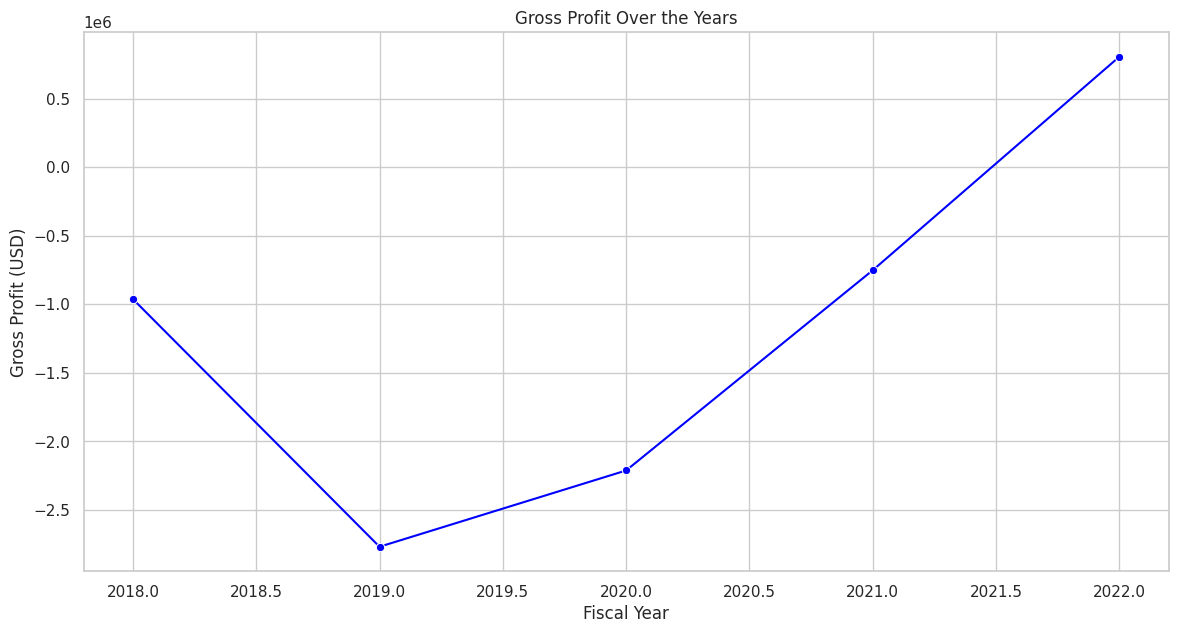

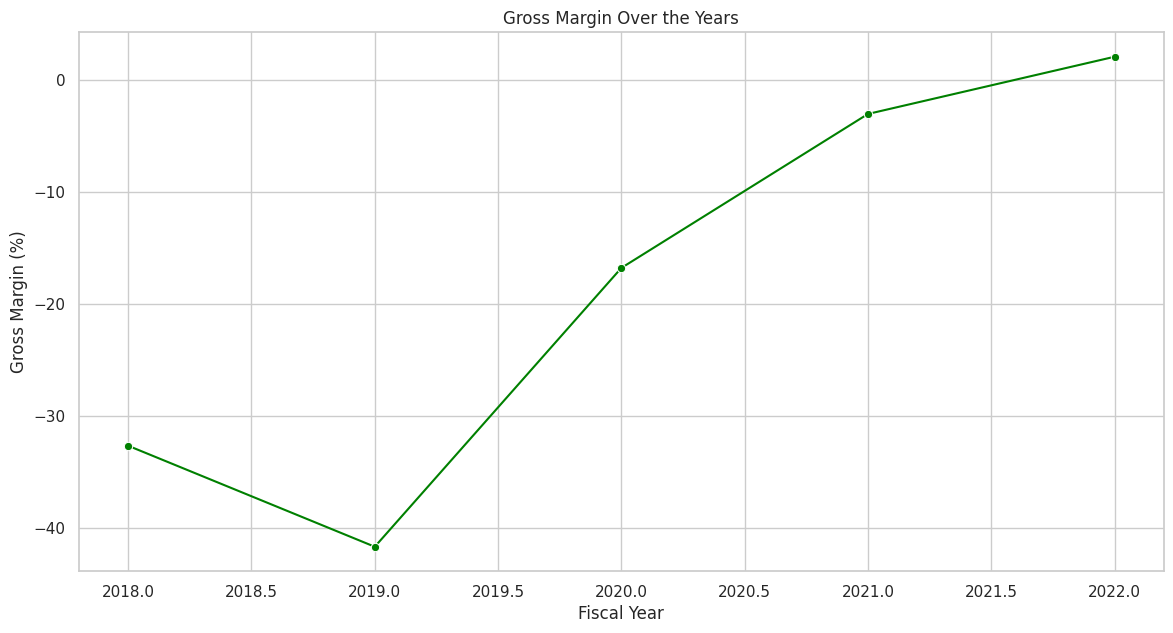

In [28]:
# Plotting the Gross Profit over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='fiscal_year', y='gross_profit', marker='o', linestyle='-', color='blue')
plt.title('Gross Profit Over the Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Gross Profit (USD)')
plt.grid(True)
plt.show()

# Plotting the Gross Margin over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='fiscal_year', y='gross_margin', marker='o', linestyle='-', color='green')
plt.title('Gross Margin Over the Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Gross Margin (%)')
plt.grid(True)
plt.show()

__Findings__

The overall trend in both gross profit and gross margin over the past four years shows a positive trajectory towards the end of the observed period. Both gross profit and gross margin were decreasing gradually until they dropped in 2019. From there until 2022, they experienced a strong rise.

Gross profit saw a notable increase, starting from approximately -2.5 million USD in fiscal year 2019 and rising consistently to nearly 8 million USD by fiscal year 2022.

In terms of gross margin, it began at -33% in 2018 and showed steady growth, with a drop in 2019 to -43%. From that point, it accelerated significantly, approaching nearly 2% by fiscal year 2022.

These trends indicate improving financial performance and efficiency in revenue generation and cost management over the analyzed period.

## Are there any seasonal trends in revenue? What is the most profitable month/period of the year/year.<a id='q5'></a>
Identifying seasonal trends helps in planning inventory, marketing campaigns, and optimizing sales strategies

In [29]:
# Connect to your SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

# SQL query to calculate average monthly revenue across all years
query = """
WITH MonthlyRevenue AS (
    SELECT
        strftime('%m', sm.date) AS month,
        SUM(fp.gross_price * sm.sold_quantity) AS total_revenue
    FROM
        fact_sales_monthly sm
    JOIN
        fact_gross_price fp ON sm.product_code = fp.product_code AND sm.fiscal_year = fp.fiscal_year
    GROUP BY
        month
)
SELECT
    month,
    AVG(total_revenue) AS average_revenue
FROM
    MonthlyRevenue
GROUP BY
    month
ORDER BY
    month;
"""

# Execute the query and load the result into a DataFrame
df = pd.read_sql_query(query, con)

# Save the DataFrame to a CSV file
df.to_csv('q5_seasonal_trends.csv', index=False)

# Close the database connection
con.close()

# Display the DataFrame
print(df)



   month  average_revenue
0     01     3.607091e+06
1     02     3.602766e+06
2     03     2.631914e+06
3     04     3.034046e+06
4     05     3.149446e+06
5     06     3.420551e+06
6     07     3.489597e+06
7     08     3.556906e+06
8     09     1.040089e+07
9     10     1.298340e+07
10    11     1.773402e+07
11    12     1.894528e+07


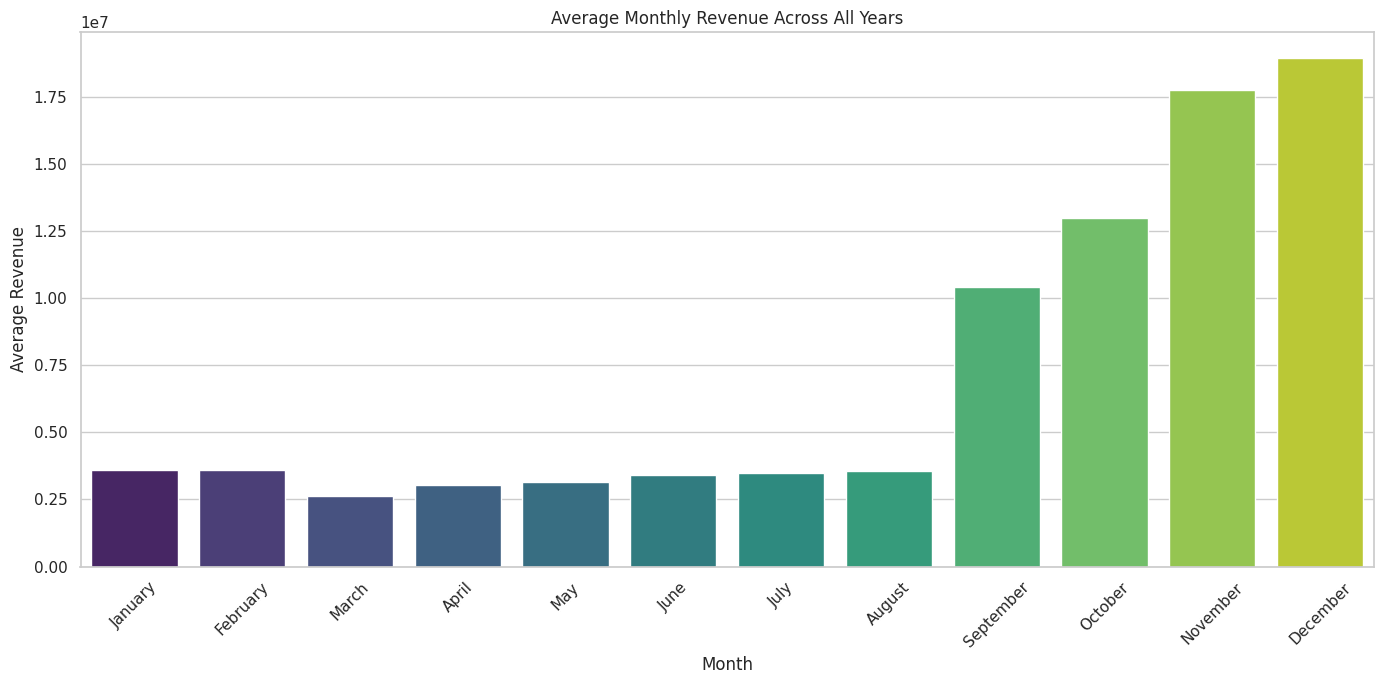

In [30]:
# Convert month to a proper datetime format for sorting and display
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name()

# Plotting with Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='month', y='average_revenue', palette='viridis')
plt.title('Average Monthly Revenue Across All Years')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


__Findings__

The graph reveals a clear seasonal trend in the company's revenue. Autumn months (September, October, and November) and December are the least profitable. From January to August, the company generates approximately 270.000 USD per month, with a slight dip in March. In September, revenue increases nearly fourfold, reaching 1 million USD. Over the next three months, revenue continues to grow, peaking at almost 2 million USD in December.


This surge is likely due to the back-to-school season and the holiday shopping period, including Black Friday, Cyber Monday, and Christmas, when demand for hardware products significantly increases.

To capitalize on these trends, the company should ensure sufficient stock levels during peak seasons, allocate more marketing resources, and increase staffing in customer service and fulfillment centers. Strengthening supplier relationships for timely product delivery and utilizing data analytics for customer engagement can further enhance sales. By strategically planning for these periods, the company can optimize operations, improve customer satisfaction, and significantly boost profitability during the most critical times of the year.

## How does revenue distribution vary across different regions and countries?<a id='q6'></a>
Analyzing revenue distribution by region and country provides insights into market performance and opportunities for expansion.


Firstly, let's look at the share of 4 regions to the total revenue.

Region Revenue DataFrame
  region  total_revenue
0   APAC   4.875613e+07
1     EU   1.893856e+07
2     NA   1.843435e+07
3  LATAM   4.268774e+05


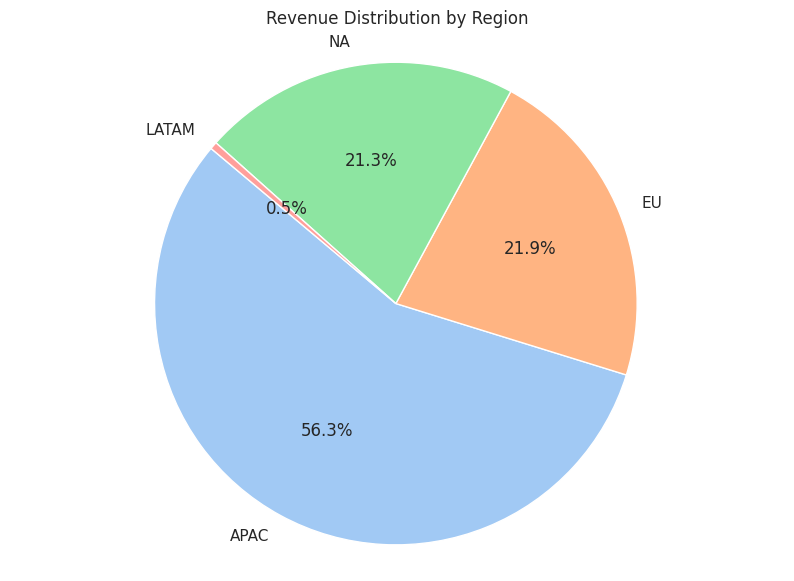

In [55]:
# Connect to the SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

# Query for total revenue by region
region_query = """
WITH RegionRevenue AS (
    SELECT
        dc.region,
        SUM(fp.gross_price * fsm.sold_quantity) AS total_revenue
    FROM
        fact_sales_monthly fsm
    JOIN
        fact_gross_price fp ON fsm.product_code = fp.product_code AND fsm.fiscal_year = fp.fiscal_year
    JOIN
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY
        dc.region
)
SELECT
    region,
    total_revenue
FROM
    RegionRevenue
ORDER BY
    total_revenue DESC;
"""

# Execute the queries and load the results into DataFrames
region_df = pd.read_sql_query(region_query, con)

# Save the DataFrame to a CSV file
region_df.to_csv('q6a_revenue_by_region.csv', index=False)

# Close the database connection
con.close()

# Display the DataFrames
print("Region Revenue DataFrame")
print(region_df)

plt.figure(figsize=(10, 7))
plt.pie(region_df['total_revenue'], labels=region_df['region'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Region')
plt.axis('equal')  
plt.show()



__Findings for the 4 Regions__

Asia-Pacific region brought almost 5 million USD, contributing 53% to the total revenue. 

European Union and North America almost 2 million USD, that is a 21.9% share and 21.3% respectively.

The region with the lowest revenue is Latin America that is around 0.4 million USD, contributing only 0.5% to the total revenue.


Business Implications:

Strategic Focus on Asia-Pacific: The Asia-Pacific region is clearly the most profitable market. AtliQ should consider increasing investments, marketing efforts, and expanding operations in this region to capitalize on its strong revenue potential.

Growth Opportunities in Europe and North America: While the European Union and North America also contribute significantly, there is room for growth. Tailored strategies to capture more market share in these regions could further boost revenues.

Reevaluation of Latin America Strategy: Given the relatively low revenue from Latin America, AtliQ might need to reassess its market strategy here. This could involve either enhancing marketing and sales efforts to increase revenue or reallocating resources to more profitable regions.




Now, let's look at the amount of revenue in USD that every region and sub-zone brings.


Country Revenue DataFrame
  sub_zone  total_revenue
0    India   2.467455e+07
1      ROA   1.965659e+07
2       NA   1.843435e+07
3       NE   1.023631e+07
4       SE   8.702248e+06
5      ANZ   4.424988e+06
6    LATAM   4.268774e+05


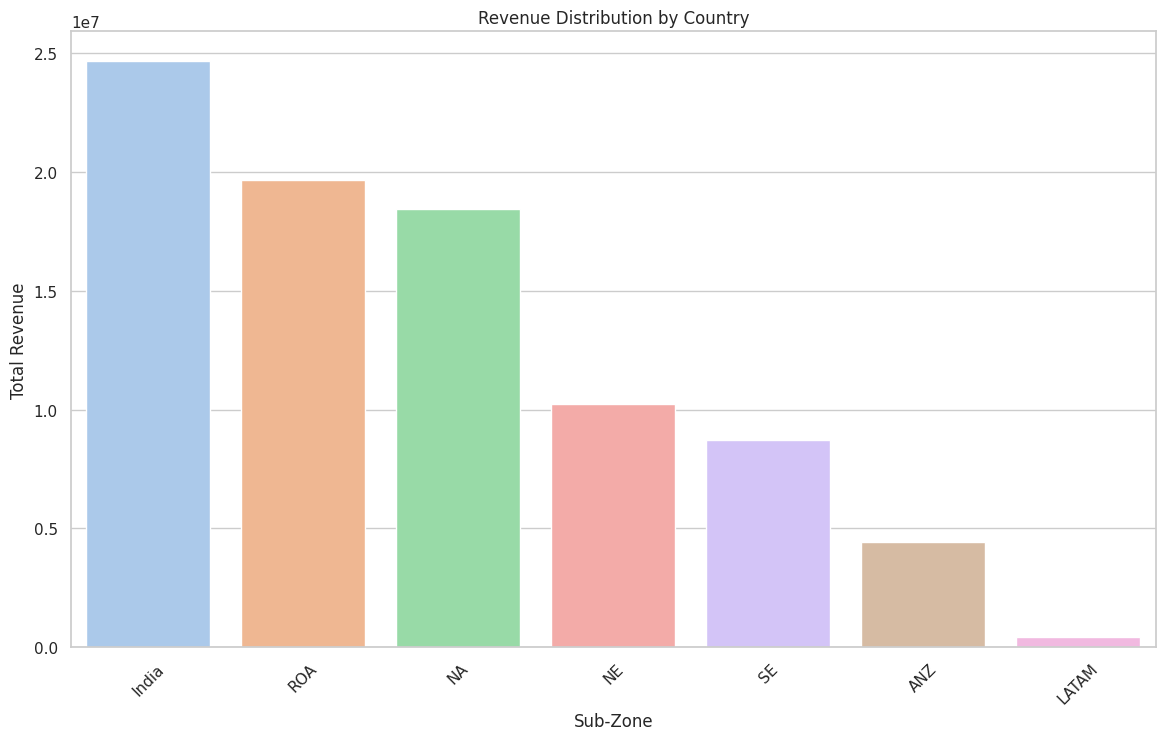

In [56]:
# Connect to the SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

# Query for total revenue by sub-zone
country_query = """
WITH CountryRevenue AS (
    SELECT
        dc.sub_zone AS sub_zone,
        SUM(fp.gross_price * fsm.sold_quantity) AS total_revenue
    FROM
        fact_sales_monthly fsm
    JOIN
        fact_gross_price fp ON fsm.product_code = fp.product_code AND fsm.fiscal_year = fp.fiscal_year
    JOIN
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY
        dc.sub_zone
)
SELECT
    sub_zone,
    total_revenue
FROM
    CountryRevenue
ORDER BY
    total_revenue DESC;
"""

country_df = pd.read_sql_query(country_query, con)

# Save the DataFrame to a CSV file
country_df.to_csv('q6b_revenue_by_sub_zone.csv', index=False)

# Close the database connection
con.close()

print("\nCountry Revenue DataFrame")
print(country_df)

# Plotting the bar chart with countries on the x-axis
plt.figure(figsize=(14, 8))
sns.barplot(data=country_df, x='sub_zone', y='total_revenue')
plt.title('Revenue Distribution by Country')
plt.xlabel('Sub-Zone')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



__Findings for 7 Sub-Zones__

India brought the highest revenue of almost 2.5 million USD, followed by the Rest of Asia with close to 2 million USD. North America generated 1.8 million USD, Northern Europe brought in nearly 1 million USD, and SE contributed 0.9 million USD. Australia and New Zealand combined generated 0.4 million USD, while Latin America brought in less than 0.4 million USD. 

Conclusion: These findings indicate that the Asia-Pacific region, particularly India and the Rest of Asia, is the most lucrative market for AtliQ. This suggests a strong focus on these areas could further drive growth. Conversely, regions like Latin America, which generate minimal revenue, may require strategic reassessment to either boost performance or allocate resources more efficiently.

Let's see the revenue distribution across 26 markets (countries).

In [57]:
# Connect to the SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

# SQL query for 26 markets
query = """
WITH RevenueByMarket AS (
    SELECT 
        dc.market,
        SUM(fsm.sold_quantity * fp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    JOIN 
        fact_gross_price fp ON fsm.product_code = fp.product_code AND fsm.fiscal_year = fp.fiscal_year
    GROUP BY 
        dc.market
)
SELECT 
    market,
    total_revenue
FROM 
    RevenueByMarket
ORDER BY 
    total_revenue DESC;
"""


# Execute the query and load the result into a DataFrame
market_df = pd.read_sql_query(query, con)

# Save the DataFrame to a CSV file
market_df.to_csv('q6c_revenue_by_market.csv', index=False)

# Close the database connection
con.close()

# Display the DataFrame
print(market_df)


            market  total_revenue
0            India   2.467455e+07
1              USA   1.389045e+07
2      South Korea   7.645632e+06
3           Canada   4.543901e+06
4      Philiphines   4.354125e+06
5   United Kingdom   3.817765e+06
6           France   3.367269e+06
7        Australia   3.192199e+06
8            China   2.532771e+06
9        Indonesia   2.525304e+06
10           Italy   2.121230e+06
11         Germany   2.015373e+06
12          Norway   1.987066e+06
13        Portugal   1.686723e+06
14           Spain   1.527026e+06
15      Newzealand   1.232790e+06
16     Netherlands   1.125859e+06
17      Bangladesh   9.202568e+05
18        Pakistan   8.935660e+05
19           Japan   7.849346e+05
20          Poland   7.740517e+05
21         Austria   3.165553e+05
22          Sweden   1.996392e+05
23          Brazil   1.945935e+05
24          Mexico   1.485207e+05
25           Chile   6.526808e+04
26        Columbia   1.849502e+04


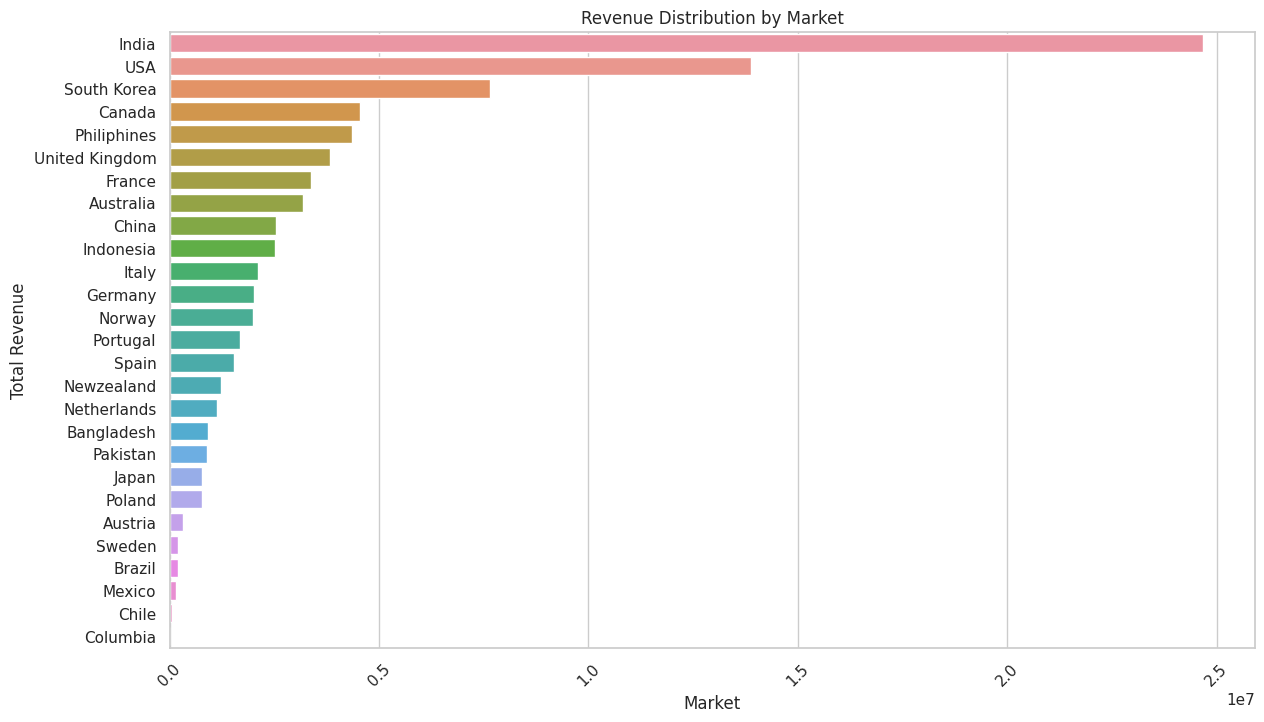

In [35]:
# Plotting the bar chart with markets on the x-axis
plt.figure(figsize=(14, 8))
sns.barplot(data=market_df, x='total_revenue', y='market')
plt.title('Revenue Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



__Findings for 26 Markets (Countries)__

India, the home country of AtliQ, generated the highest revenue of almost 2.5 billion USD, followed by the USA with 1.4 billion USD. South Korea is in third place with nearly 0.8 billion USD. The remaining countries each contributed up to 0.4 billion USD.

Business Implications:

Strategic Importance of India: With India generating the highest revenue, AtliQ should prioritize maintaining and expanding its market presence here. This could involve increasing product offerings, enhancing customer service, and implementing targeted marketing campaigns.

Growth Potential in the USA and South Korea: The substantial revenue from the USA and South Korea indicates strong market potential. AtliQ should focus on strategies to further penetrate these markets, such as partnerships, localized marketing, and product customization.

Assessment of Smaller Markets: For countries contributing up to 0.4 billion USD, AtliQ should evaluate the cost-effectiveness of current strategies and consider tailored approaches to boost revenue. This might include market research to identify specific needs and preferences, as well as optimizing distribution channels.

# Step 3: Checking hypothesis

## Hypotheses 1:Revenue has gradually grown over the years

Now, let's proceed with the statistical test.

To find whether the revenue has gradually grown over the years, we can perform a hypothesis test, such as the Mann-Whitney U test.

Null Hypothesis ((H_0)):

(H_0): There is no a significant upward trend in revenue over the past few years.

Alternative Hypothesis((H_1)):

(H_1): There is a significant upward trend in revenue over the past few years.

Now, let's calculate the p-value for the Mann-Whitney U test and interpret the results.


In [36]:
# Connect to the SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

# SQL query to get revenue by year
query = """
WITH YearlyRevenue AS (
    SELECT 
        strftime('%Y', fsm.date) AS year,
        SUM(fsm.sold_quantity * fp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        fact_gross_price fp ON fsm.product_code = fp.product_code AND fsm.fiscal_year = fp.fiscal_year
    GROUP BY 
        year
)
SELECT 
    year,
    total_revenue
FROM 
    YearlyRevenue
ORDER BY 
    year;
"""

# Execute the query and load the result into a DataFrame
yearly_revenue_df = pd.read_sql_query(query, con)

# Close the database connection
con.close()

# Display the DataFrame
print(yearly_revenue_df)

# Extract year and total revenue data
years = yearly_revenue_df['year'].astype(int)
revenue = yearly_revenue_df['total_revenue']

# Perform the Mann-Kendall trend test
tau, p_value = kendalltau(years, revenue)

# Output the test results
print(f"Mann-Kendall tau: {tau}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant upward trend in revenue over the past few years.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant trend in revenue over the past few years.")


   year  total_revenue
0  2017   1.228885e+06
1  2018   4.523042e+06
2  2019   1.038248e+07
3  2020   1.696592e+07
4  2021   5.345558e+07
Mann-Kendall tau: 0.9999999999999999
P-value: 0.016666666666666666
Reject the null hypothesis (H0). There is a significant upward trend in revenue over the past few years.


__Conclusion__

We proved that there is a significant upward trend in revenue over the past few years. 

__Findings:__

The analysis reveals a significant upward trend in revenue over the past few years at AtliQ. From 2017 to 2021, total revenue has shown substantial growth, starting at approximately 1.23 million USD in 2017 and reaching 53.46 million USD in 2021. The trend indicates consistent year-over-year increases, with particularly notable growth from 2020 onwards.

__Business Implications:__

This upward revenue trend suggests that AtliQ's strategies, market positioning, and product offerings have been effective in capturing market demand and expanding revenue streams. Such consistent growth not only reflects positively on operational efficiency and customer satisfaction but also signals opportunities for further expansion and investment. It's crucial for AtliQ to maintain these growth trajectories by continuing to innovate, adapt to market dynamics, and capitalize on emerging opportunities to sustain its competitive edge in the industry.

## Hypothesis 2: Revenue from international markets has grown at a faster rate compared to the domestic market.

To find whether the revenue from international markets has grown at a faster rate compared to the domestic market, we can perform a hypothesis test, such as the Mann-Whitney U test.

Null Hypothesis ((H_0)):

(H_0): Revenue from international markets has not grown at a faster rate compared to the domestic market.

Alternative Hypothesis((H_1)):

(H_1): Revenue from international markets has grown at a faster rate compared to the domestic market.

Now, let's calculate the p-value for the Mann-Whitney U test and interpret the results.

In [37]:
# Connect to the SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

# SQL query to get revenue by year for domestic (India) and international markets
query = """
WITH RevenueByMarketYear AS (
    SELECT 
        CASE 
            WHEN dc.market = 'India' THEN 'Domestic'
            ELSE 'International'
        END AS market_type,
        strftime('%Y', fsm.date) AS year,
        SUM(fsm.sold_quantity * fp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    JOIN 
        fact_gross_price fp ON fsm.product_code = fp.product_code AND fsm.fiscal_year = fp.fiscal_year
    GROUP BY 
        market_type, year
)
SELECT 
    market_type,
    year,
    total_revenue
FROM 
    RevenueByMarketYear;
"""

# Execute the query and load the result into a DataFrame
revenue_df = pd.read_sql_query(query, con)

# Close the database connection
con.close()

# Display the DataFrame
print(revenue_df)


     market_type  year  total_revenue
0       Domestic  2017   5.435087e+05
1       Domestic  2018   1.671436e+06
2       Domestic  2019   2.944829e+06
3       Domestic  2020   4.562672e+06
4       Domestic  2021   1.495210e+07
5  International  2017   6.853759e+05
6  International  2018   2.851606e+06
7  International  2019   7.437649e+06
8  International  2020   1.240325e+07
9  International  2021   3.850348e+07


In [38]:
# Separate data for domestic and international markets
domestic_df = revenue_df[revenue_df['market_type'] == 'Domestic'].copy()
international_df = revenue_df[revenue_df['market_type'] == 'International'].copy()

# Calculate growth rates
domestic_df.loc[:, 'growth_rate'] = domestic_df['total_revenue'].pct_change()
international_df.loc[:, 'growth_rate'] = international_df['total_revenue'].pct_change()

# Drop NaN values resulting from pct_change
domestic_df = domestic_df.dropna(subset=['growth_rate'])
international_df = international_df.dropna(subset=['growth_rate'])

# Display the DataFrames
print(domestic_df)
print(international_df)


  market_type  year  total_revenue  growth_rate
1    Domestic  2018   1.671436e+06     2.075269
2    Domestic  2019   2.944829e+06     0.761856
3    Domestic  2020   4.562672e+06     0.549384
4    Domestic  2021   1.495210e+07     2.277050
     market_type  year  total_revenue  growth_rate
6  International  2018   2.851606e+06     3.160646
7  International  2019   7.437649e+06     1.608231
8  International  2020   1.240325e+07     0.667631
9  International  2021   3.850348e+07     2.104306


In [39]:
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(domestic_df['growth_rate'], international_df['growth_rate'], alternative='less')

# Set significance level
alpha = 0.05  # Example: 5% significance level

# Compare p-value to significance level
if p_value < alpha:
    print(f"Reject the null hypothesis. Revenue from international markets has grown at a faster rate compared to the domestic market.")
else:
    print(f"Fail to reject the null hypothesis. Revenue from international markets has not grown at a faster rate compared to the domestic market.")


Fail to reject the null hypothesis. Revenue from international markets has not grown at a faster rate compared to the domestic market.


__Conclusion__

We proved that the revenue from international markets has not grown at a faster rate compared to the domestic market. 
From the analysis we concluded that Indian market contributed the most to the total revenue of the compnay. 

__Findings__:
The analysis reveals that revenue growth rates between domestic (India) and international markets show varying trends over the past few years. In the domestic market, revenue steadily increased from 2018 to 2021, with growth rates ranging from 0.55% to 2.28%. Meanwhile, international markets experienced fluctuating growth rates, peaking in 2018 at 3.16% and subsequently varying between 0.67% and 2.10% in the following years. Despite these fluctuations, there is no statistically significant evidence to suggest that revenue from international markets has grown at a faster rate compared to the domestic market.

__Business Implications__:
The findings suggest that AtliQ's strategies in the domestic market, particularly in India, have been effective in maintaining steady revenue growth over the years. This consistency may indicate strong market penetration and customer loyalty in the domestic market segment. However, the fluctuating growth rates in international markets highlight the complexities and challenges of operating across diverse global markets. To capitalize on growth opportunities and mitigate market risks, AtliQ may need to tailor its strategies differently for each market, focusing on localized market dynamics, competitive landscapes, and consumer preferences to sustain and accelerate revenue growth globally.

## Hypothesis 3: There are significant seasonal spikes in revenue

To find whether there are significant seasonal spikes in revenue, we can perform a hypothesis test, such as Kruskal-Wallis H statistics.

Null Hypothesis ((H_0)):

(H_0): There are no significant seasonal spikes in revenue

Alternative Hypothesis((H_1)):

(H_1): There are significant seasonal spikes in revenue

Now, let's calculate the p-value for the Kruskal-Wallis H statistics and interpret the results.

    year month  total_revenue
0   2017    09   2.035608e+05
1   2017    10   2.645338e+05
2   2017    11   3.751914e+05
3   2017    12   3.855987e+05
4   2018    01   2.087000e+05
5   2018    02   2.076068e+05
6   2018    03   2.242247e+05
7   2018    04   2.195039e+05
8   2018    05   2.105693e+05
9   2018    06   2.132027e+05
10  2018    07   2.104337e+05
11  2018    08   2.208852e+05
12  2018    09   5.095770e+05
13  2018    10   6.204582e+05
14  2018    11   8.035240e+05
15  2018    12   8.743568e+05
16  2019    01   4.943185e+05
17  2019    02   4.998604e+05
18  2019    03   4.792342e+05
19  2019    04   4.923904e+05
20  2019    05   5.004923e+05
21  2019    06   4.829228e+05
22  2019    07   4.470652e+05
23  2019    08   4.374041e+05
24  2019    09   1.143612e+06
25  2019    10   1.395193e+06
26  2019    11   1.944794e+06
27  2019    12   2.065191e+06
28  2020    01   1.116846e+06
29  2020    02   1.093464e+06
30  2020    03   1.536568e+05
31  2020    04   5.140976e+05
32  2020  

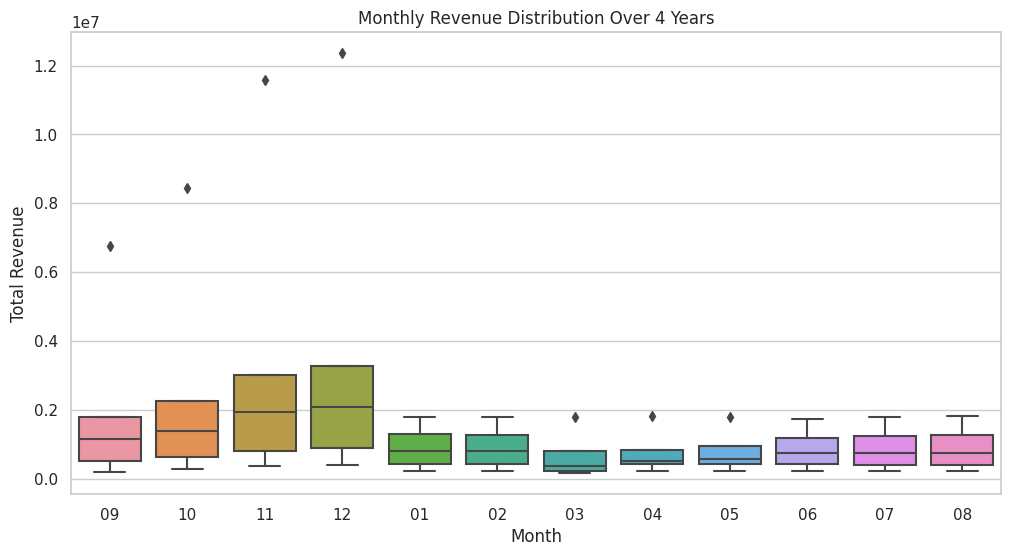

Kruskal-Wallis H statistic: 9.179390420899836
P-value: 0.6053378525237474
Fail to reject the null hypothesis (H0). There are no significant seasonal spikes in revenue.


In [40]:
# Connect to the SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

# SQL query to get monthly revenue for each year
query = """
WITH MonthlyRevenue AS (
    SELECT 
        strftime('%Y', fsm.date) AS year,
        strftime('%m', fsm.date) AS month,
        SUM(fsm.sold_quantity * fp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        fact_gross_price fp ON fsm.product_code = fp.product_code AND fsm.fiscal_year = fp.fiscal_year
    GROUP BY 
        year, month
)
SELECT 
    year,
    month,
    total_revenue
FROM 
    MonthlyRevenue
ORDER BY 
    year, month;
"""

# Execute the query and load the result into a DataFrame
monthly_revenue_df = pd.read_sql_query(query, con)

# Close the database connection
con.close()

# Display the DataFrame
print(monthly_revenue_df)

# Visualize the monthly revenue distribution using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='total_revenue', data=monthly_revenue_df)
plt.title('Monthly Revenue Distribution Over 4 Years')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

# Extract revenue data for statistical testing
monthly_revenue = [monthly_revenue_df[monthly_revenue_df['month'] == month]['total_revenue'].values for month in monthly_revenue_df['month'].unique()]

# Perform the Kruskal-Wallis H test
h_stat, p_value = kruskal(*monthly_revenue)

# Output the test results
print(f"Kruskal-Wallis H statistic: {h_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis (H0). There are significant seasonal spikes in revenue.")
else:
    print("Fail to reject the null hypothesis (H0). There are no significant seasonal spikes in revenue.")

    

__Conclusion__
We proved that there are no significant sesonal spikes in revenue. 

__Findings__:
Based on the analysis using the Kruskal-Wallis H test, there is no evidence to reject the null hypothesis (H0) that there are no significant seasonal spikes in revenue across the years 2017-2021. The boxplot visualization and statistical test indicate that while there are fluctuations in monthly revenue, these variations do not reach statistical significance across the observed months.

__Business Implications__:
While significant seasonal spikes were not detected in this analysis, it is important for AtliQ to continue monitoring revenue trends closely. Understanding seasonal fluctuations, even if not statistically significant, can still provide insights into consumer behavior and market dynamics. This ongoing monitoring allows AtliQ to adjust marketing strategies, inventory management, and operational planning to capitalize on potential opportunities during peak periods and mitigate challenges during slower months. By maintaining flexibility and responsiveness to market dynamics, AtliQ can optimize performance and maintain sustainable growth in the competitive hardware market.

# Step 3: Conclusion

Financial Analysis Report: Insights and Recommendations

__1. Revenue Trends__

The analysis of AtliQ's revenue over the past four years reveals a significant upward trend. Starting from mid-2017 to early 2022, total revenue has shown consistent growth. The revenue increased steadily from approximately 1.2 million USD in 2017 to over 53 million USD by the end of 2021. This growth indicates a robust performance in sales and market expansion over the years.

Implications: The consistent growth in revenue suggests effective market strategies, strong product demand, and potentially successful expansion efforts into new markets or product lines.

__2. Profitability by Product Categories__

From our detailed examination of product categories, it is evident that the majority of revenue is driven by two categories: 'Internal HDD' and 'Graphic Card.' These categories collectively contribute over 6.1 million USD in revenue. Other product categories have not shown profitability consistently throughout the four years, which may be attributed to higher manufacturing costs, competitive pressures, or lower margins.

Implications: AtliQ should consider focusing more resources and efforts on optimizing and expanding its profitable product categories while reevaluating strategies for less profitable ones to improve overall profitability.

__3. Regional Revenue Distribution__

APAC (Asia-Pacific) emerges as the highest revenue contributor, accounting for approximately 53% of total revenue, followed by European Union (21.9%) and North America (21.3%). Conversely, Latin America contributes the lowest share, approximately 0.5% of total revenue.

Implications: AtliQ should continue to strengthen its presence in high-revenue regions like APAC and the EU while exploring growth opportunities in underperforming regions to diversify and stabilize revenue streams.

__4. Market Segment Performance__

Analyzing revenue by market segments, India stands out as the highest revenue-generating market, contributing nearly 2.5 billion USD, followed by USA with 1.4 billion USD and South Korea with 0.8 billion USD. Other countries collectively contribute up to 0.4 billion USD each.

Implications: AtliQ should maintain a strong focus on key markets like India and the USA, leveraging market-specific strategies to sustain growth and capitalize on emerging opportunities in South Korea and other promising markets.

__5. Seasonal Revenue Analysis__

Our analysis of seasonal revenue patterns, despite initial visual observations of spikes in September to December, did not yield statistically significant results. The Kruskal-Wallis test suggested no significant seasonal variations in revenue.

Implications: Further investigation may be warranted using alternative statistical methods or qualitative analysis to better understand and potentially leverage seasonal consumer behaviors and market dynamics.

__Recommendations:__

Focus on Core Product Categories: Allocate resources to enhance and expand 'Internal HDD' and 'Graphic Card' product lines to maintain and potentially increase profitability.

Regional Expansion Strategy: Continue to strengthen market presence in high-revenue regions while exploring opportunities in emerging markets to diversify revenue streams.

Market-Specific Strategies: Develop tailored marketing and sales strategies for key markets such as India, the USA, and South Korea to maximize market penetration and revenue growth.

Seasonal Insights: Conduct further analysis using additional statistical tests or qualitative methods to validate seasonal revenue patterns and optimize marketing and inventory strategies accordingly.

__Conclusion:__

AtliQ has demonstrated strong financial performance with consistent revenue growth and significant contributions from key product categories and regions. Strategic focus on profitable product lines and targeted regional expansion will be crucial for sustaining growth and profitability in the competitive global market.

Tableau Presenatation

In [41]:
# Connect to the SQLite database
con = sqlite3.connect('atliq_db.sqlite3')

query="""SELECT 
fact_sales_monthly.date AS date, 
fact_sales_monthly.product_code AS product_code, 
fact_sales_monthly.customer_code AS customer_code, 
fact_sales_monthly.sold_quantity AS sold_quantity, 
fact_sales_monthly.fiscal_year AS fiscal_year,
fact_manufacturing_cost.manufacturing_cost AS manufacturing_cost,
fact_manufacturing_cost.cost_year AS cost_year,
fact_gross_price.gross_price AS gross_price,
fact_pre_discount.pre_invoice_discount_pct AS discount_pct,
dim_customer.customer AS customer,
dim_customer.market AS market,
dim_customer.sub_zone AS sub_zone,
dim_customer.region AS region,
dim_product.category AS category,
dim_product.product AS product 

FROM 
fact_sales_monthly

LEFT JOIN fact_manufacturing_cost ON fact_manufacturing_cost.product_code = fact_sales_monthly.product_code 
AND fact_manufacturing_cost.cost_year = fact_sales_monthly.fiscal_year

LEFT JOIN fact_gross_price ON fact_gross_price.product_code = fact_sales_monthly.product_code 
AND fact_gross_price.fiscal_year = fact_sales_monthly.fiscal_year

LEFT JOIN fact_pre_discount ON fact_pre_discount.customer_code = fact_sales_monthly.customer_code 
AND fact_pre_discount.fiscal_year = fact_sales_monthly.fiscal_year

LEFT JOIN dim_customer ON dim_customer.customer_code = fact_sales_monthly.customer_code 

LEFT JOIN dim_product ON dim_product.product_code = fact_sales_monthly.product_code 

WHERE
fact_sales_monthly.customer_code IS NOT NULL AND
fact_sales_monthly.date >= '2017-09-01' AND fact_sales_monthly.date <= '2021-08-01'


"""
sales_full=pd.read_sql_query(query, con)
sales_full.head(1)

,date,product_code,customer_code,sold_quantity,fiscal_year,manufacturing_cost,cost_year,gross_price,discount_pct,customer,market,sub_zone,region,category,product
0,2017-09-01,A0118150101,70002017,51,2018,4.619,2018,15.3952,0.0824,Atliq Exclusive,India,India,APAC,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...


In [42]:
#We have full data on sales, now we can calculate revenue and create a column with month of the year.

sales_full['revenue']= ((sales_full['gross_price']-sales_full['gross_price']/100*sales_full['discount_pct'])*sales_full['sold_quantity']).round(2)
sales_full['month'] = pd.to_datetime(sales_full['date']).dt.month_name()
sales_full.head(1)

,date,product_code,customer_code,sold_quantity,fiscal_year,manufacturing_cost,cost_year,gross_price,discount_pct,customer,market,sub_zone,region,category,product,revenue,month
0,2017-09-01,A0118150101,70002017,51,2018,4.619,2018,15.3952,0.0824,Atliq Exclusive,India,India,APAC,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,784.51,September


In [43]:
sales_full['gross_profit']= (sales_full['revenue']
                             -(sales_full['manufacturing_cost']*sales_full['sold_quantity'])
                            ).round(2)
sales_full.head(1)

,date,product_code,customer_code,sold_quantity,fiscal_year,manufacturing_cost,cost_year,gross_price,discount_pct,customer,market,sub_zone,region,category,product,revenue,month,gross_profit
0,2017-09-01,A0118150101,70002017,51,2018,4.619,2018,15.3952,0.0824,Atliq Exclusive,India,India,APAC,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,784.51,September,548.94


In [44]:
#We will group data by date with total gross profit by month and add column with month.

sales_change=sales_full.groupby(['date', 'fiscal_year'])['gross_profit'].sum().reset_index()
sales_change['month'] = pd.to_datetime(sales_change['date']).dt.month
sales_change.head()

,date,fiscal_year,gross_profit,month
0,2017-09-01,2018,142572.90,9
1,2017-10-01,2018,185438.59,10
2,2017-11-01,2018,263036.78,11
3,2017-12-01,2018,270054.23,12
4,2018-01-01,2018,146284.53,1


In [45]:
sales_full['customer']=sales_full['customer'].replace('Amazon ', 'Amazon')
customers=sales_full.groupby(['customer'])['revenue'].sum().round().reset_index()
customers=customers.sort_values(by=['revenue'], ascending=False).reset_index(drop=True)
customers_top=customers.head(20)
customers_top

,customer,revenue
0,Amazon,7105892.0
1,Atliq e Store,4413515.0
2,Atliq Exclusive,3963879.0
3,Sage,1738867.0
4,Flipkart,1703788.0
5,Leader,1693968.0
6,Ebay,1266117.0
7,Electricalsocity,1018538.0
8,Synthetic,880180.0
9,Neptune,863455.0


In [46]:
sales_full.to_csv('sales.csv', index=False)
